In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# EDA

In [ ]:
df.shape

(600, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [ ]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [ ]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [ ]:
df.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


### Outlier Detection

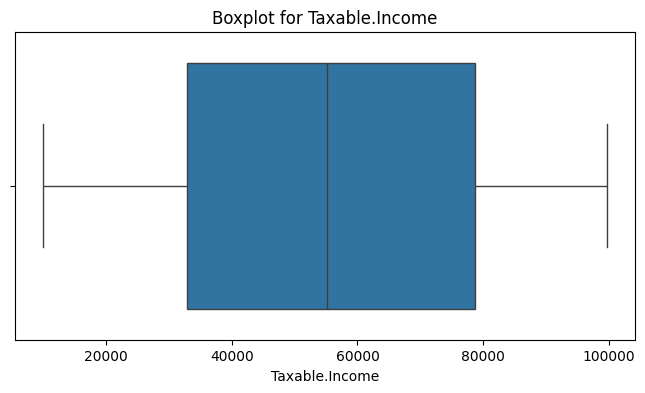

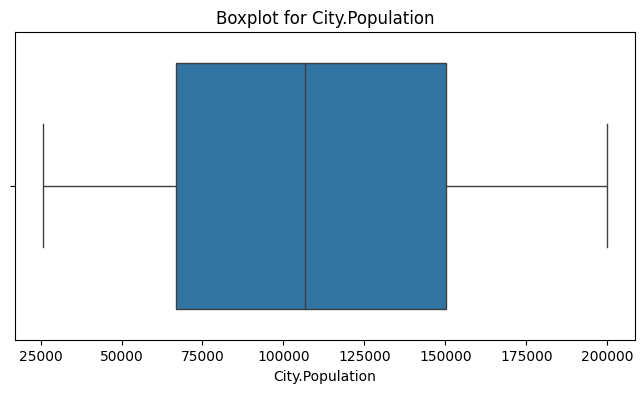

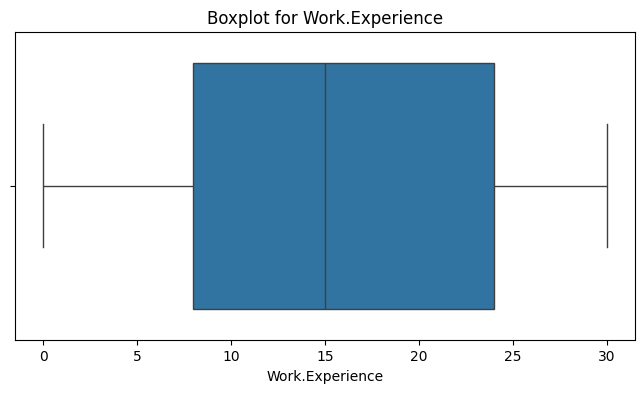

In [ ]:
numerical_features = df.select_dtypes(include='number').columns

for column in numerical_features:
    plt.figure(figsize=(8,4))  # Optional: Set the figure size
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

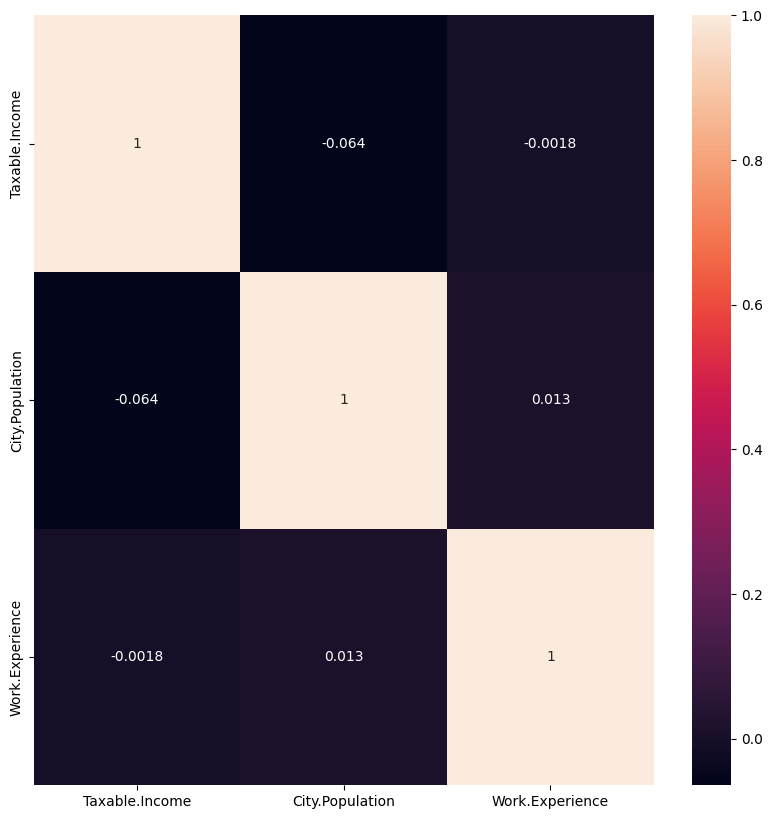

In [ ]:
# Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Data Visualization

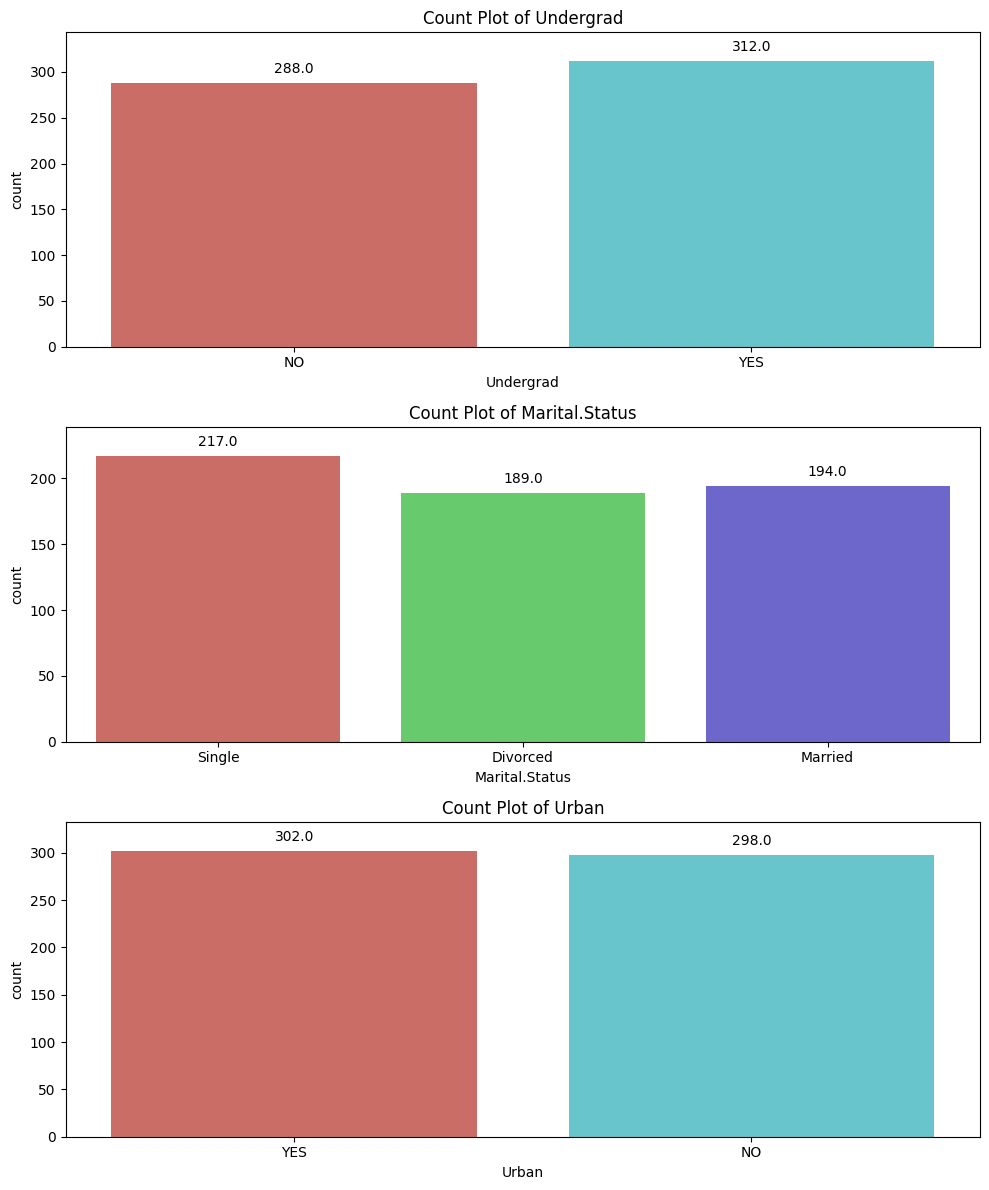

In [ ]:
# Constructing count plot fot categorical columns
categorical_featutes = df.select_dtypes(include=['object', 'category']).columns

# Set up subplots based on the number of columns
fig, axes = plt.subplots(nrows=len(categorical_featutes), ncols=1, figsize=(10, len(categorical_featutes) * 4))

# Iterate through each feature and create a count plot
for i, feature in enumerate(categorical_featutes):
    sns.countplot(x=feature, data=df, ax=axes[i], palette='hls')
    axes[i].set_title(f'Count Plot of {feature}')

    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    axes[i].set_ylim(top=df[feature].value_counts().max() * 1.1)

plt.tight_layout()
plt.show()

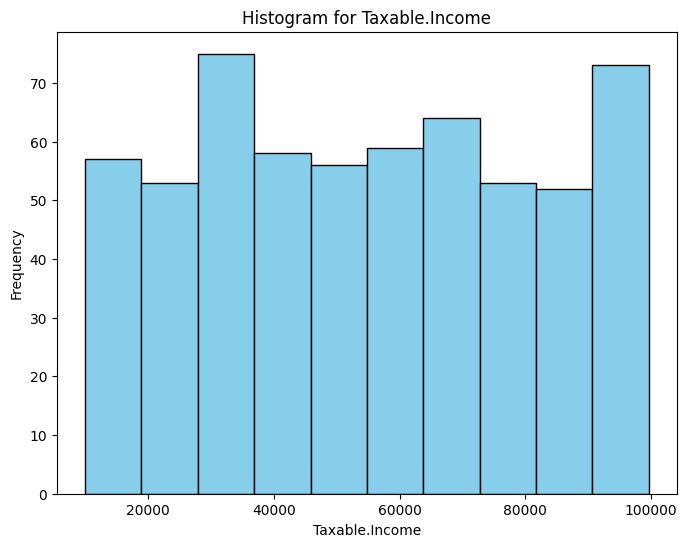

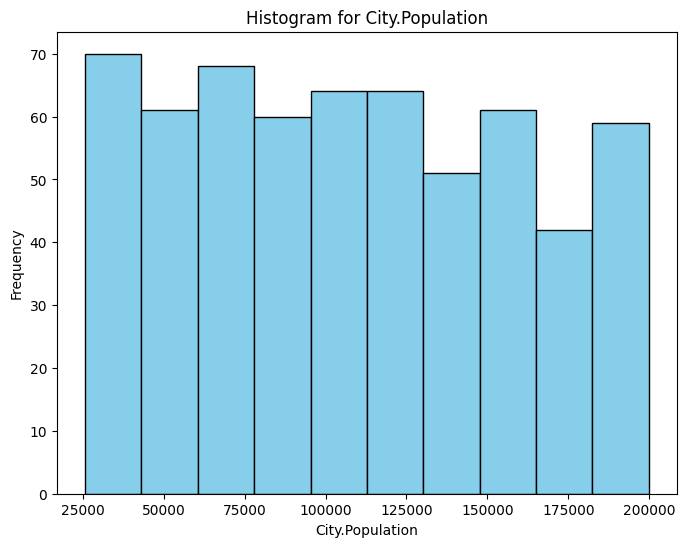

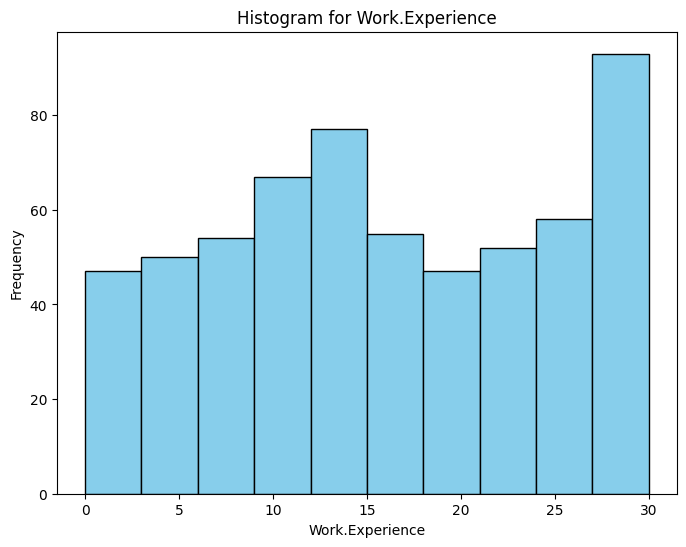

In [ ]:
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.hist(df[feature], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Histogram for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

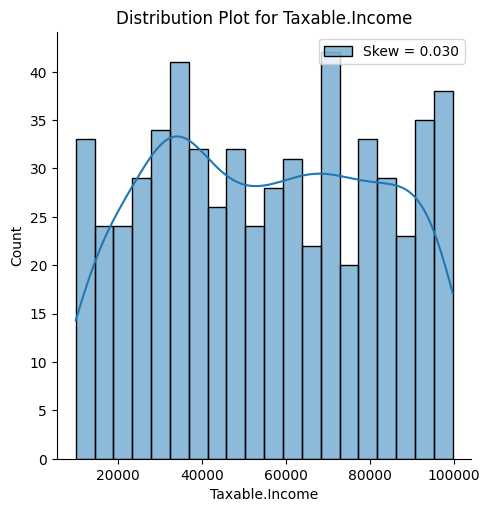

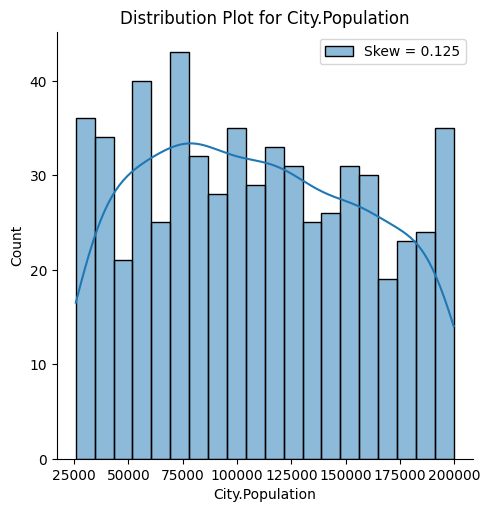

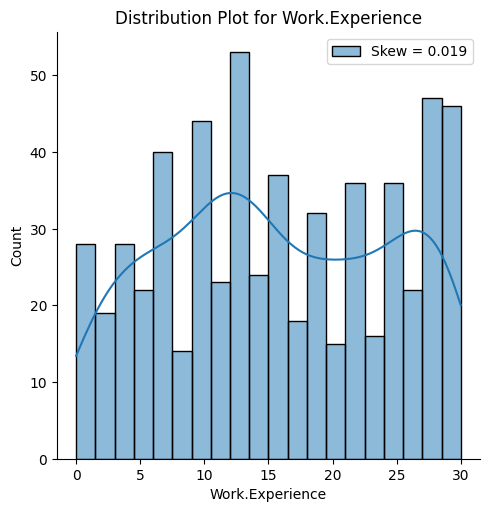

In [ ]:
# Distribution plot for all numerical features
numerical_features = df.select_dtypes(include='number').columns

for feature in numerical_features:
    skew = df[feature].skew()
    sns.displot(df[feature], kde= True, label='Skew = %.3f' %(skew), bins=20)
    plt.legend(loc='best')
    plt.title(f'Distribution Plot for {feature}')
    plt.show()

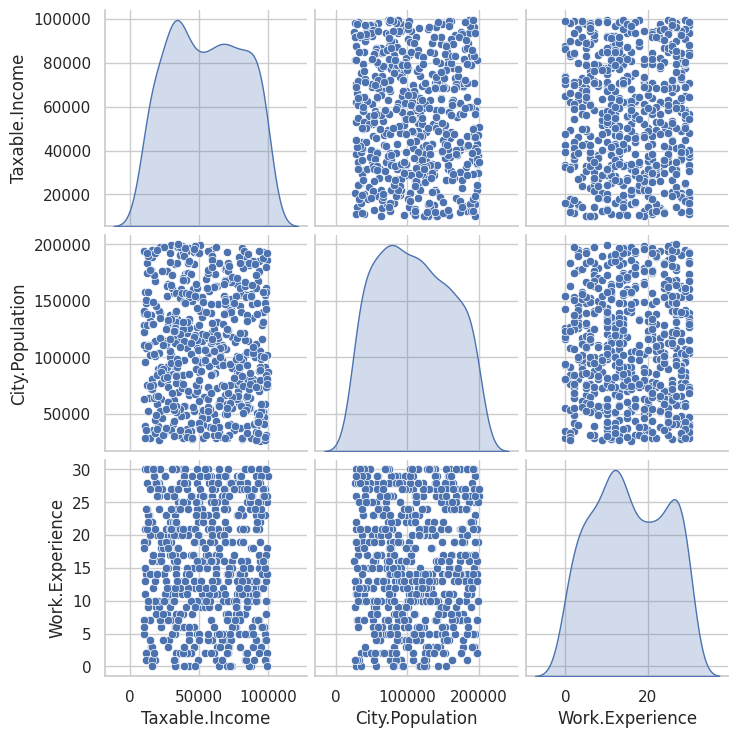

In [ ]:
# Pairplot
sns.set(style="whitegrid")
sns.pairplot(df, diag_kind="kde")
plt.show()

# Data Preprocessing

In [ ]:
import pandas as pd
df['Taxable.Income'] = df['Taxable.Income'].map(lambda x: 'Risky' if x <= 30000 else 'Good')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


Converted the 'Taxable.Income' variable from numerical to categorical, categorizing observations as '**Risky**' if the value <=30,000 and as '**Good**' if the value > 30,000.

## Label Encoding

In [ ]:
# Label encoding all the categorical features
categorical_features = df.select_dtypes(include=['object', 'category']).columns

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for feature in categorical_features:
  df[feature] = LE.fit_transform(df[feature])

## Splitting the data as X and Y

In [ ]:
X = df.drop('Taxable.Income', axis = 1)
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [ ]:
Y = df['Taxable.Income']
Y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable.Income, Length: 600, dtype: int64

## Data Partition

In [ ]:
# Splitting data into training and testing data set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

# Model Building

## 1. **Entropy** Criteria

## **HyperParameter Tuning**

### Finding the optimal **n_estimators**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': list(np.arange(0,200,5))[1:]}
grid_search = GridSearchCV(RandomForestClassifier(criterion = 'entropy',
                                                  random_state = 42,
                                                  n_jobs = -1), param_grid, cv=5)
grid_search.fit(X_train, Y_train)

n_estimators = grid_search.best_params_['n_estimators']
print("Best n_estimators:",  n_estimators )


Best n_estimators: 115


### Finding the optimal **max_depth**

In [ ]:
param_grid = {'max_depth': list(np.arange(10,31))}
grid_search = GridSearchCV(RandomForestClassifier(criterion = 'entropy',
                                                  random_state = 42,
                                                  n_estimators = n_estimators,
                                                  n_jobs = -1), param_grid, cv=5)
grid_search.fit(X_train, Y_train)

max_depth =  grid_search.best_params_['max_depth']
print("Best max_depth:", max_depth)


Best max_depth: 10


### Finding the optimal **max_features**

In [ ]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2']}
grid_search = GridSearchCV(RandomForestClassifier(criterion = 'entropy',
                                                  random_state = 42,
                                                  n_estimators = n_estimators,
                                                  max_depth = max_depth,
                                                  n_jobs = -1), param_grid, cv=5)
grid_search.fit(X_train, Y_train)

max_features = grid_search.best_params_['max_features']
print("Best max_features:", max_features)


Best max_features: auto


# Building the **Random Forest** model with optimal parameters using **Entropy** criteria

In [ ]:
RF_entropy = RandomForestClassifier(criterion = 'entropy',
                                    n_estimators = n_estimators,
                                    max_depth = max_depth,
                                    max_features = max_features,
                                    random_state = 42,
                                    n_jobs = -1)

In [ ]:
RF_entropy.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='auto',
                       n_estimators=115, n_jobs=-1, random_state=42)

### Training Predictions

In [ ]:
Y_train_pred = RF_entropy.predict(X_train)

In [ ]:
print(accuracy_score(Y_train, Y_train_pred))

0.95625


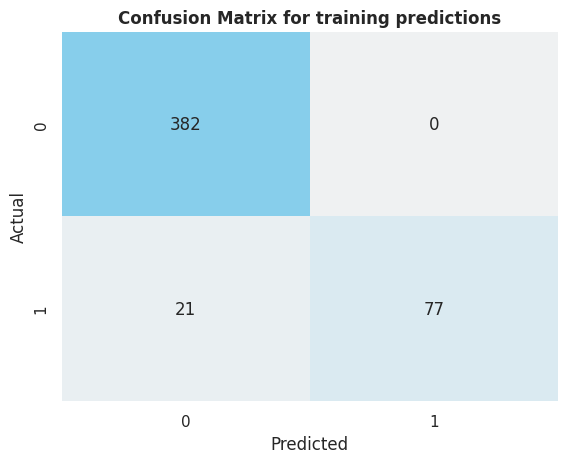

In [ ]:
# Confusion Matrix for Training Predictions
cm = confusion_matrix(Y_train, Y_train_pred)

# Plot the confusion matrix using seaborn
cmap = sns.light_palette("skyblue", as_cmap=True)
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=False)
plt.title('Confusion Matrix for training predictions', fontweight = 'bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Test Predictions

In [ ]:
Y_test_pred = RF_entropy.predict(X_test)

In [ ]:
print(accuracy_score(Y_test, Y_test_pred))

0.775


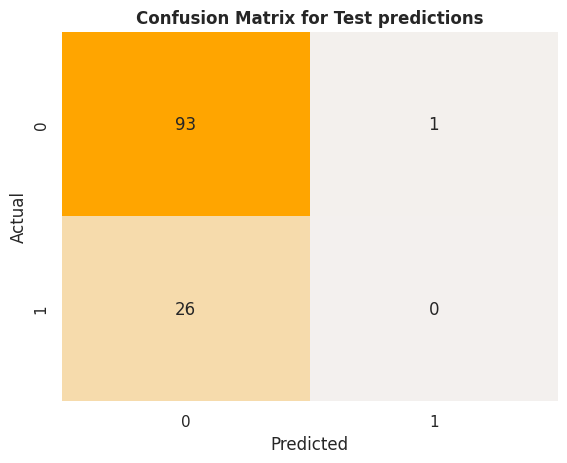

In [ ]:
# Confusion Matrix for Test Predictions
cm = confusion_matrix(Y_test, Y_test_pred)

# Plot the confusion matrix using seaborn
cmap = sns.light_palette("orange", as_cmap=True)
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=False)
plt.title('Confusion Matrix for Test predictions', fontweight = 'bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Classification repor
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87        94
           1       0.00      0.00      0.00        26

    accuracy                           0.78       120
   macro avg       0.39      0.49      0.44       120
weighted avg       0.61      0.78      0.68       120



## Important Features

In [ ]:
RF_entropy.feature_importances_

array([0.04709353, 0.07104846, 0.50580835, 0.33302895, 0.04302071])

In [ ]:
# Important Features
import pandas as pd
feature_imp = pd.Series(RF_entropy.feature_importances_, index = X_train.columns).sort_values(ascending = False)
feature_imp

City.Population    0.505808
Work.Experience    0.333029
Marital.Status     0.071048
Undergrad          0.047094
Urban              0.043021
dtype: float64

# Visualizing Important Features

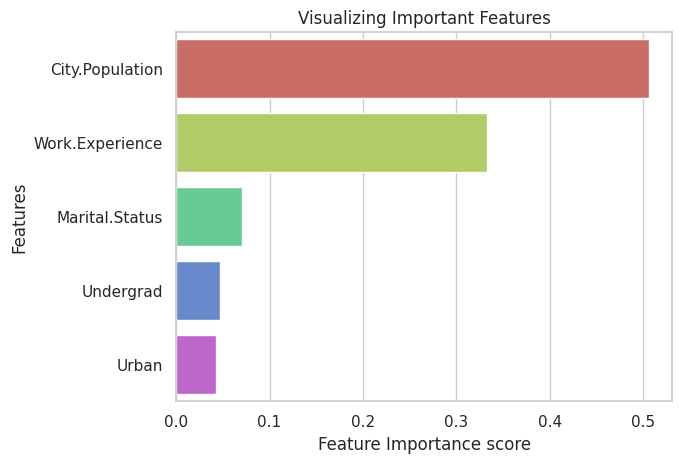

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x = feature_imp, y = feature_imp.index, palette = 'hls')
plt.xlabel('Feature Importance score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

### From the above barplot, we can conclude that "**City Population**" is the most important feature among all.

# Exploring the **Random Tree** in Random Forest

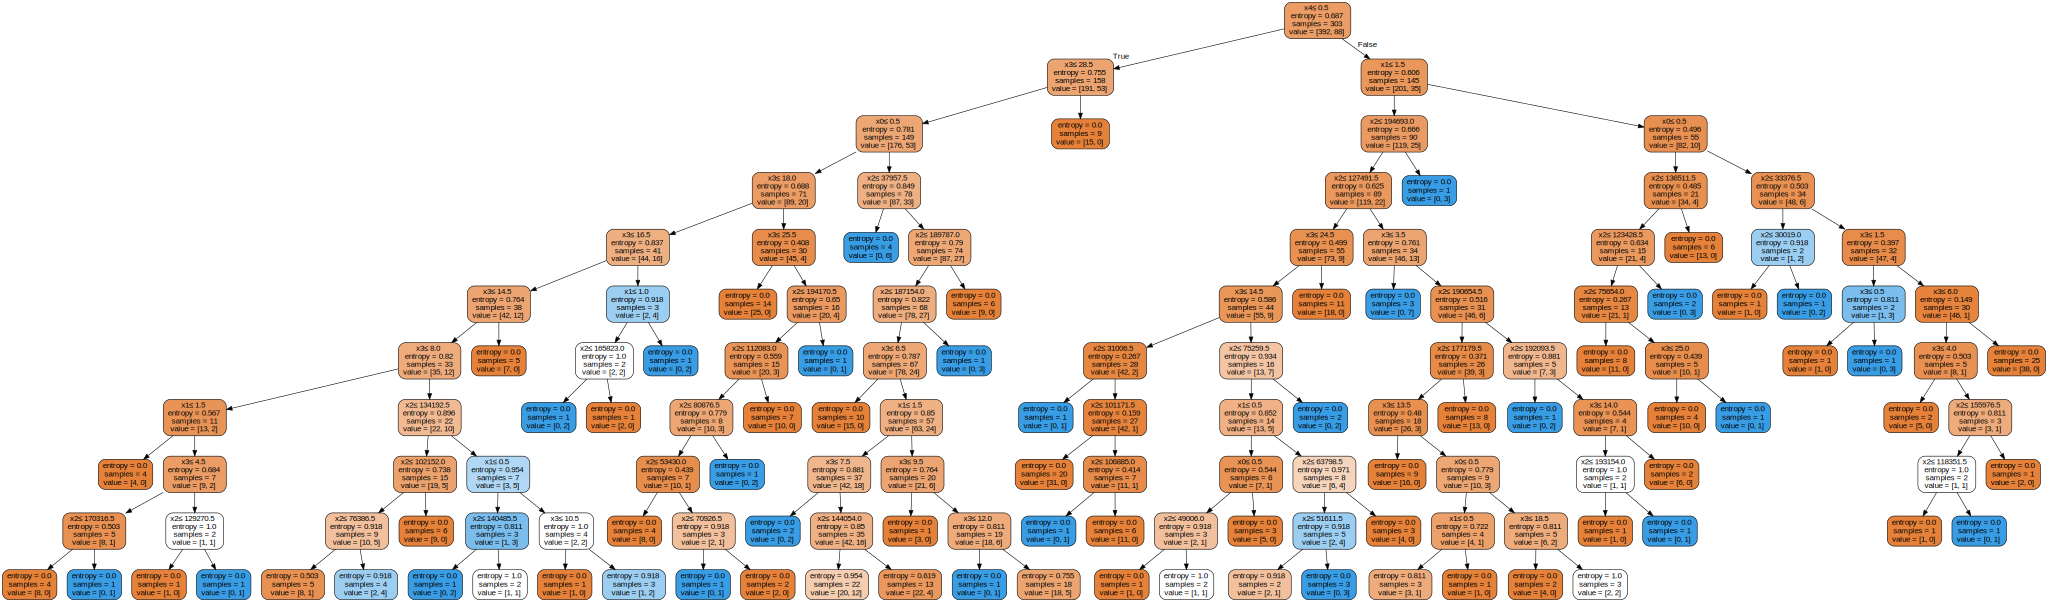

In [ ]:
from sklearn import tree
import graphviz

RF_entropy = RandomForestClassifier(criterion = 'entropy',
                                 n_estimators = n_estimators,
                                 max_depth = max_depth,
                                 max_features = max_features,
                                 n_jobs = -1,
                                 random_state = 42)

RF_entropy.fit(X_train, Y_train)

# Choose one tree from the forest (e.g., the first tree)
selected_tree = RF_entropy.estimators_[5]

dot_data = tree.export_graphviz(selected_tree,filled=True, rounded=True,
                    special_characters=True)
graph = graphviz.Source(dot_data)
graph

# Cross-Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

RF_entropy = RandomForestClassifier(criterion = 'entropy',
                                    n_estimators = n_estimators,
                                    max_depth = max_depth,
                                    max_features = max_features,
                                    random_state = 42,
                                    n_jobs = -1)

scores = []

for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Train your model
    RF_entropy.fit(X_train, Y_train)

    # Evaluate on the test set
    Y_pred = RF_entropy.predict(X_test)
    score = accuracy_score(Y_test, Y_pred)
    scores.append(score)

print(f"Average accuracy: {np.mean(scores).round(3)}")


Average accuracy: 0.777


In [ ]:
training_accuracy = []
test_accuracy = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=i)
    RF_entropy.fit(X_train,Y_train)
    Y_train_pred = RF_entropy.predict(X_train)
    Y_test_pred  = RF_entropy.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train ,Y_train_pred))
    test_accuracy.append(accuracy_score(Y_test ,Y_test_pred))

import numpy as np
print("Average training accuracy:",np.mean(training_accuracy).round(3))
print("Average test accuracy:",np.mean(test_accuracy).round(3))

Average training accuracy: 0.95
Average test accuracy: 0.771


#       

# 2. **Gini** Criteria

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

## **HyperParameter Tuning**

## Finding the optimal **n_estimators**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': list(np.arange(0,200,5))[1:]}
grid_search = GridSearchCV(RandomForestClassifier(criterion = 'gini',
                                                  random_state = 42,
                                                  n_jobs = -1), param_grid, cv=5)
grid_search.fit(X_train, Y_train)

n_estimators = grid_search.best_params_['n_estimators']
print("Best n_estimators:",  n_estimators )


Best n_estimators: 10


## Finding the optimal **max_depth**

---



In [ ]:
param_grid = {'max_depth': list(np.arange(1,31))}
grid_search = GridSearchCV(RandomForestClassifier(criterion = 'gini',
                                                  random_state = 42,
                                                  n_estimators = n_estimators,
                                                  n_jobs = -1), param_grid, cv=5)
grid_search.fit(X_train, Y_train)

max_depth =  grid_search.best_params_['max_depth']
print("Best max_depth:", max_depth)


Best max_depth: 3


## Finding the optimal **max_features**

In [ ]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2']}
grid_search = GridSearchCV(RandomForestClassifier(criterion = 'gini',
                                                  random_state = 42,
                                                  n_estimators = n_estimators,
                                                  max_depth = max_depth,
                                                  n_jobs = -1), param_grid, cv=5)
grid_search.fit(X_train, Y_train)

max_features = grid_search.best_params_['max_features']
print("Best max_features:", max_features)


Best max_features: auto


# Building the **Random Forest** model with optimal parameters using **Gini** Criteria

In [ ]:
RF_gini = RandomForestClassifier(criterion = 'gini',
                                 n_estimators = n_estimators,
                                 max_depth = max_depth,
                                 max_features = max_features,
                                 n_jobs = -1,
                                 random_state = 42)

In [ ]:
RF_gini.fit(X_train, Y_train)

RandomForestClassifier(max_depth=3, max_features='auto', n_estimators=10,
                       n_jobs=-1, random_state=42)

## Training Predictions

In [ ]:
Y_train_pred = RF_gini.predict(X_train)

In [ ]:
print(accuracy_score(Y_train, Y_train_pred))

0.7958333333333333


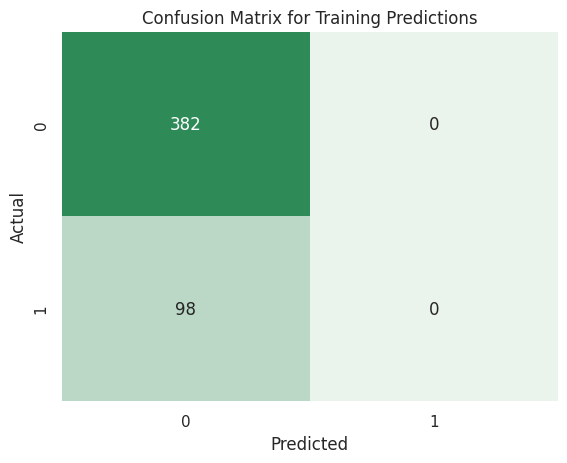

In [ ]:
# Confusion Matrix for Training Predictions
cm = confusion_matrix(Y_train, Y_train_pred)

# Plot the confusion matrix using seaborn
cmap = sns.light_palette("seagreen", as_cmap=True)
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=False)
plt.title('Confusion Matrix for Training Predictions')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Test Predictions

In [ ]:
Y_test_pred = RF_gini.predict(X_test)

In [ ]:
print(accuracy_score(Y_test, Y_test_pred))

0.7833333333333333


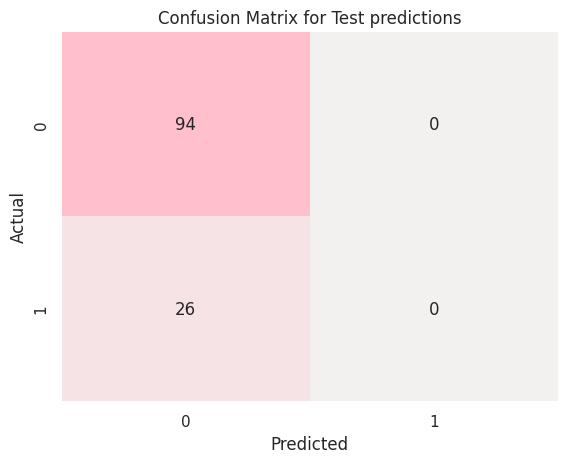

In [ ]:
# Confusion Matrix for Test Predictions
cm = confusion_matrix(Y_test, Y_test_pred)

# Plot the confusion matrix using seaborn
cmap = sns.light_palette("pink", as_cmap=True)
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=False)
plt.title('Confusion Matrix for Test predictions')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Classification report
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        94
           1       0.00      0.00      0.00        26

    accuracy                           0.78       120
   macro avg       0.39      0.50      0.44       120
weighted avg       0.61      0.78      0.69       120



## Important Features

In [ ]:
RF_gini.feature_importances_

array([0.07624223, 0.15374012, 0.39204448, 0.32885745, 0.04911572])

In [ ]:
# Important Features
import pandas as pd
feature_imp = pd.Series(RF_gini.feature_importances_, index = X_train.columns).sort_values(ascending = False)
feature_imp

City.Population    0.392044
Work.Experience    0.328857
Marital.Status     0.153740
Undergrad          0.076242
Urban              0.049116
dtype: float64

# Visualizing Important Features

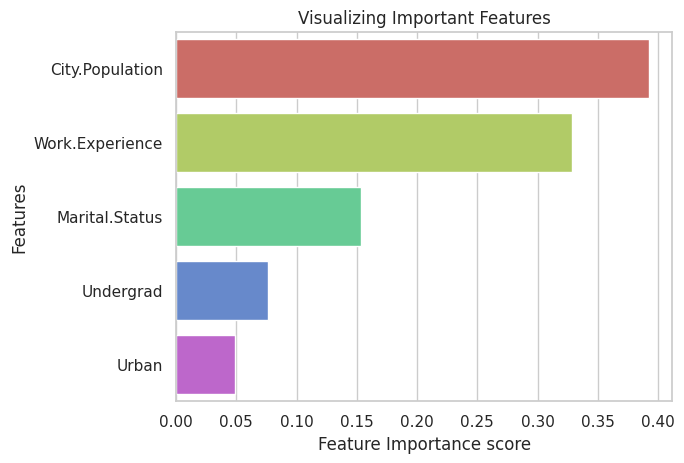

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x = feature_imp, y = feature_imp.index, palette = 'hls')
plt.xlabel('Feature Importance score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

### From the above barplot, we can conclude that "**City Population**" is the most important feature.

# Exploring the **Random Tree** in Random Forest

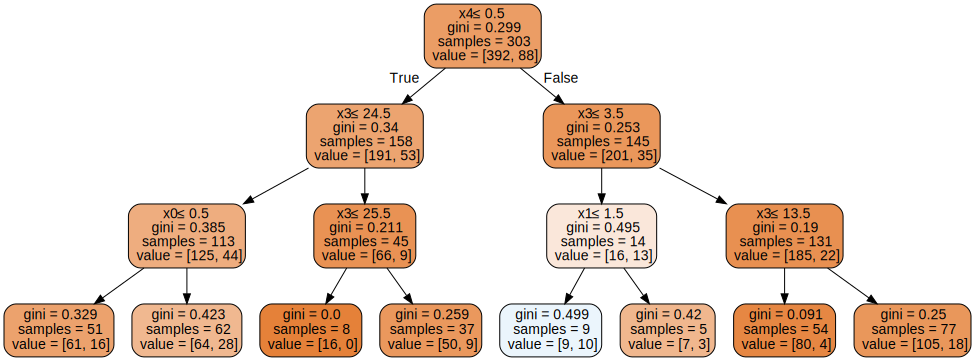

In [ ]:
from sklearn import tree
import graphviz

RF_gini = RandomForestClassifier(criterion = 'gini',
                                 n_estimators = n_estimators,
                                 max_depth = max_depth,
                                 max_features = max_features,
                                 n_jobs = -1,
                                 random_state = 42)

RF_gini.fit(X_train, Y_train)

selected_tree = RF_gini.estimators_[5]

dot_data = tree.export_graphviz(selected_tree,filled=True, rounded=True,
                    special_characters=True)
graph = graphviz.Source(dot_data)
graph

# Evaluating the model using **Cross-Validation**

### 1. **K-Fold** Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

RF_gini = RandomForestClassifier(criterion = 'gini',
                                 n_estimators = n_estimators,
                                 max_depth = max_depth,
                                 max_features = max_features,
                                 n_jobs = -1,
                                 random_state = 42)

scores = []
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Train your model
    RF_gini.fit(X_train, Y_train)

    # Evaluate on the test set
    Y_pred = RF_gini.predict(X_test)
    score = accuracy_score(Y_test, Y_pred)
    scores.append(score)

print(f"Average accuracy: {np.mean(scores).round(3)}")


Average accuracy: 0.793


### 2. Model Performance across different **data splits**

In [ ]:
training_accuracy = []
test_accuracy = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=i)
    RF_gini.fit(X_train,Y_train)
    Y_train_pred = RF_gini.predict(X_train)
    Y_test_pred  = RF_gini.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train ,Y_train_pred))
    test_accuracy.append(accuracy_score(Y_test ,Y_test_pred))

import numpy as np
print("Average training accuracy:",np.mean(training_accuracy).round(3))
print("Average test accuracy:",np.mean(test_accuracy).round(3))

Average training accuracy: 0.794
Average test accuracy: 0.793


#         

# **Conclusion**

## The Random Forest models, utilizing the **Entropy** and **Gini** criteria, achieved training set accuracies of **96%** and **79%** during cross-validation. Interestingly, the accuracy on the test data was consistent at around **80%** for both criteria.